# Importar librerías

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Importar base de datos

In [48]:
df = pd.read_csv('Datasets/datos_limpios.csv')

In [49]:
df.shape

(4401, 26)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4401 non-null   int64  
 1   attrition                   4401 non-null   object 
 2   business_travel             4401 non-null   object 
 3   department                  4401 non-null   object 
 4   distance_from_home          4401 non-null   int64  
 5   education                   4401 non-null   object 
 6   education_field             4401 non-null   object 
 7   gender                      4401 non-null   object 
 8   job_level                   4401 non-null   int64  
 9   job_role                    4401 non-null   object 
 10  marital_status              4401 non-null   object 
 11  monthly_income              4401 non-null   int64  
 12  num_companies_worked        4401 non-null   float64
 13  percent_salary_hike         4401 

# Análisis de correlación

## Correlación de variables numéricas

Seleccionar variables numéricas

In [51]:
df_numericas = df.select_dtypes(include=['int64', 'float64'])

Obtener matriz de correlaciones

In [52]:
corr_matrix = df_numericas.corr()
corr_matrix = corr_matrix.apply(lambda x: np.round(x, 3))
corr_matrix

,age,distance_from_home,job_level,monthly_income,num_companies_worked,percent_salary_hike,stock_option_level,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,mean_time
age,1.000,0.007,-0.002,-0.044,0.299,-0.033,-0.032,0.681,-0.028,0.311,0.216,0.202,-0.000
distance_from_home,0.007,1.000,-0.038,-0.022,-0.014,0.039,0.011,0.009,-0.010,0.031,0.002,0.021,0.010
job_level,-0.002,-0.038,1.000,0.047,-0.010,0.011,0.001,-0.037,-0.032,-0.064,-0.061,-0.055,0.011
monthly_income,-0.044,-0.022,0.047,1.000,-0.021,0.004,0.027,-0.034,0.050,0.001,0.065,0.024,-0.012
num_companies_worked,0.299,-0.014,-0.010,-0.021,1.000,0.030,0.016,0.239,-0.031,-0.117,-0.036,-0.109,-0.017
percent_salary_hike,-0.033,0.039,0.011,0.004,0.030,1.000,0.013,-0.019,-0.037,-0.029,-0.029,-0.041,0.026
stock_option_level,-0.032,0.011,0.001,0.027,0.016,0.013,1.000,0.003,-0.069,0.009,0.020,0.019,-0.010
total_working_years,0.681,0.009,-0.037,-0.034,0.239,-0.019,0.003,1.000,-0.041,0.628,0.404,0.459,-0.012
training_times_last_year,-0.028,-0.010,-0.032,0.050,-0.031,-0.037,-0.069,-0.041,1.000,-0.010,0.016,-0.015,-0.007
years_at_company,0.311,0.031,-0.064,0.001,-0.117,-0.029,0.009,0.628,-0.010,1.000,0.618,0.769,-0.021


Mapa de calor de correlaciones

In [53]:
fig = px.imshow(corr_matrix, text_auto=True)
fig.layout.update(height=700)
fig.show()

Las correlaciones más significativas son:

- Entre edad y total de años trabajando. Con una correlación de 0.68, tiene sentido que los empleados de más edad sean los que lleven más años trabajando.

- Entre total de años trabajando y total de años en la compañía. Los empleados que llevan más años como empleados tienden a ser los que llevan más años en la compañía.

- Entre años en la compañía y años desde la última promoción. Entre más tiempo tenga el empleado en la compañía es más probable que haya pasado mucho tiempo desde su último ascenso.

- Entre años en la compañía y años al mando del jefe actual.

Todas las variables relacionadas con el tiempo de estancia del empleado en la empresa tienen una correlación alta. 'years_at_company' y 'years_with_curr_manager' se pueden considerar variables redundantes y sería bueno eliminar una de estas, veremos qué resultados obtenemos con otros métodos de selección de variables como la regularización.

## Correlación entre la variable objetivo y variables categóricas

Obtener variables categóricas

In [54]:
df_categoricas = df.select_dtypes(include='object')
df_categoricas.columns

Index(['attrition', 'business_travel', 'department', 'education',
       'education_field', 'gender', 'job_role', 'marital_status',
       'environment_satisfaction', 'job_satisfaction', 'work_life_balance',
       'job_involvement', 'performance_rating'],
      dtype='object')

Función que calcula los p-valores de la prueba chi cuadrado entre la variable objetivo y cada variable categórica independiente.

In [75]:
from scipy.stats import chi2_contingency

def corr_cat(df):
    
    cols = df.columns
    df_corr_cat = pd.DataFrame()

    corrs = []
    for col in cols:
        tabla_contingencia = pd.crosstab(df['attrition'], df[col])
        chi2, p, _, _ = chi2_contingency(tabla_contingencia)
        corrs.append(p)
    df_corr_cat['attrition'] = corrs
    df_corr_cat.index = cols
    
    return df_corr_cat

In [76]:
df_corr_cat = corr_cat(df_categoricas).sort_values(by='attrition', ascending=False)
df_corr_cat

,attrition
gender,2.347675e-01
education,2.158986e-01
performance_rating,1.220560e-01
job_involvement,3.424144e-02
job_role,2.365690e-03
department,1.076723e-06
education_field,8.191044e-09
work_life_balance,8.816362e-11
job_satisfaction,1.857492e-11
environment_satisfaction,4.565831e-14


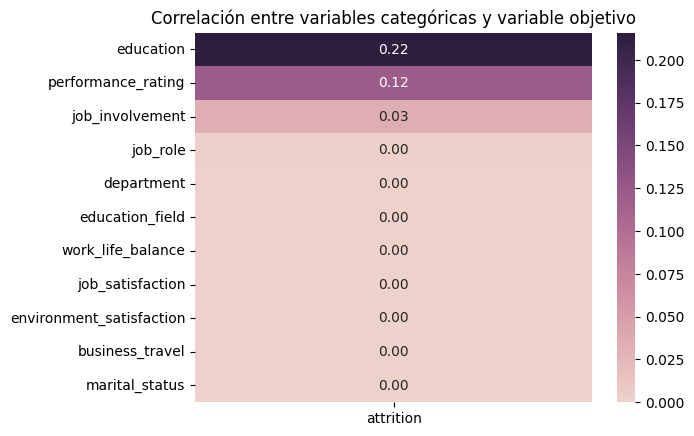

In [63]:
plt.figure()
sns.heatmap(df_corr_cat.iloc[1:-1,:], annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f")
plt.title("Correlación entre variables categóricas y variable objetivo")
plt.show()

Utilizando un nivel de significancia de 0.05, se puede concluir de las pruebas chi cuadrado que no hay evidencias de que las variables Educación, Género, Nivel del puesto, Nivel de opciones sobre acciones del empleado y Valoración del rendimiento en el último año tienen una correlación significativa con la variable objetivo(el empleado abandonó el año anterior).

## Correlación entre la variable objetivo y las variables numéricas independientes

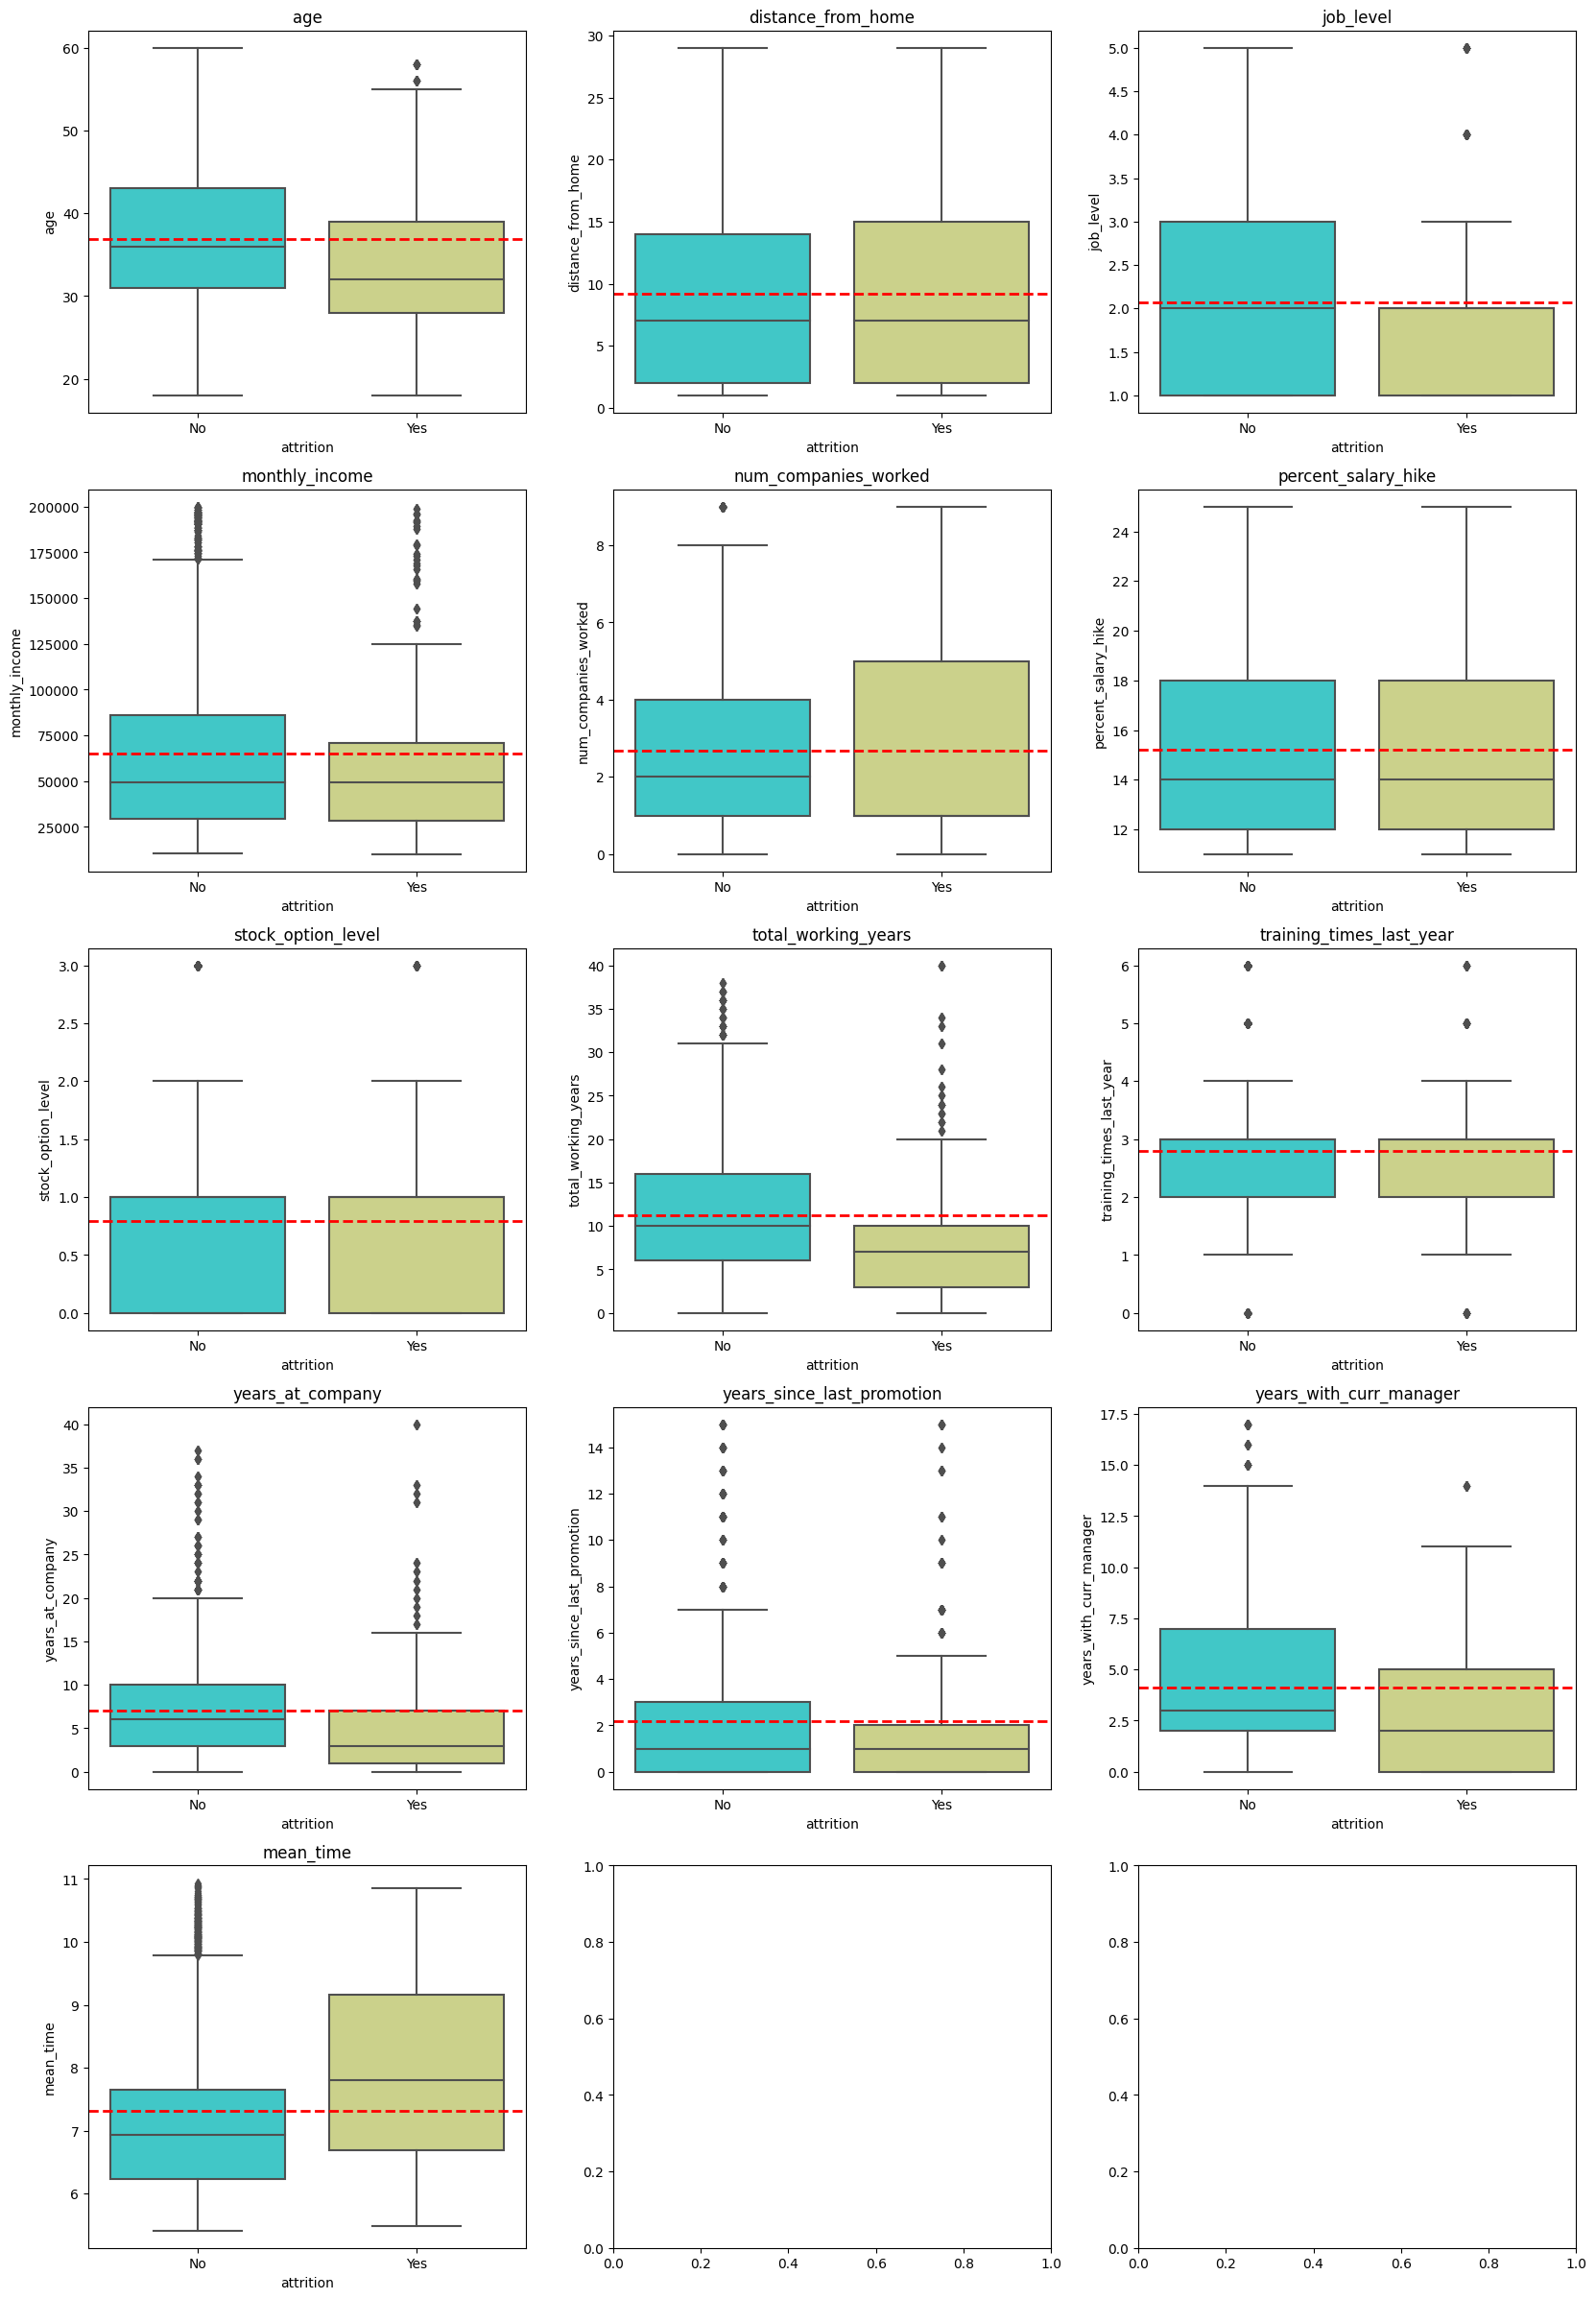

In [74]:
fig, axs = plt.subplots(5, 3, figsize=(20, 30))

rows = [0,0,0,1,1,1,2,2,2,3,3,3,4]
cols = [0,1,2,0,1,2,0,1,2,0,1,2,0]
variables = df_numericas.columns

for i in range(len(variables)):

    sns.boxplot(x = 'attrition', y = variables[i], data = df, palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

Las variables distance_from_home, percent_salary_hike, stop_option_level y training_times_last_year no presentan diferencias respecto a la variable objetivo, es decir, sus distribuciones son casi iguales para ambas categorías de la variable objetivo. Lo anterior nos permite tener presentes estas variables como variables que van a aportar muy poco o nada de información a los modelos.

En palabras del negocio, la distancia desde casa, el porcentaje de aumento del salario, el nivel de opciones sobre acciones y las veces que fue entrenado el empleado durante el último año no influyen en el abandono del empleado.

## Otras relaciones

Intuitivamente, se puede esperar que algunas variables categóricas, diferentes de la objetivo, tengan una relación significativa. Exploremos esto:

In [100]:
def Analisisbivariado(variables,orient,mode,color,):
    contingency_table =pd.crosstab(df[variables[0]],df[variables[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    fig=px.bar(contingency_table,orientation=orient,barmode=mode,color_discrete_sequence=color)
    fig.update_layout(width=800,title=dict(text=f'{variables[0]} & {variables[1]}', x=0.5))
    fig.update_traces(texttemplate='%{value:.2%}', textposition='outside')
    print("Tabla de contingencia:")
    display(contingency_table)
    fig.show()
    
    return chi2, p, _, _

### Departamento vs Frecuencia de viajes por trabajo

In [104]:
chi2, p, _, _ = Analisisbivariado(['department', 'business_travel'],'v','relative',px.colors.qualitative.Plotly)
print('Chi cuadrado: ', chi2)
print('Valor p:', p)

Tabla de contingencia:


business_travel,Non_Travel,Travel_Frequently,Travel_Rarely
department,,,
Human Resources,0.047872,0.127660,0.824468
Research & Development,0.114355,0.180049,0.705596
Sales,0.083084,0.214820,0.702096


Chi cuadrado:  27.754337063206656
Valor p: 1.3987579409590345e-05


### Satisfacción con el entorno vs Saltisfacción laboral

In [105]:
chi2, p, _, _ = Analisisbivariado(['environment_satisfaction', 'job_satisfaction'],'v','relative',px.colors.qualitative.Plotly)
print('Chi cuadrado: ', chi2)
print('Valor p:', p)

Tabla de contingencia:


job_satisfaction,Alto,Bajo,Medio,Muy alto
environment_satisfaction,,,,
Alto,0.280612,0.204082,0.190962,0.324344
Bajo,0.350711,0.187204,0.167062,0.295024
Medio,0.291911,0.189918,0.203986,0.314185
Muy alto,0.291291,0.195195,0.195946,0.317568


Chi cuadrado:  15.37784670122934
Valor p: 0.08106644433470316


### Balance entre vida y trabajo vs Estado civil

In [106]:
chi2, p, _, _ = Analisisbivariado(['work_life_balance', 'marital_status'],'v','relative',px.colors.qualitative.Plotly)
print('Chi cuadrado: ', chi2)
print('Valor p:', p)

Tabla de contingencia:


marital_status,Divorced,Married,Single
work_life_balance,,,
Buena,0.257115,0.446516,0.296369
La mejor,0.211454,0.475771,0.312775
Mala,0.158996,0.527197,0.313808
Muy buena,0.216437,0.452585,0.330978


Chi cuadrado:  16.694596734192164
Valor p: 0.010473672829569762


In [107]:
df.columns

Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'gender',
       'job_level', 'job_role', 'marital_status', 'monthly_income',
       'num_companies_worked', 'percent_salary_hike', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager',
       'environment_satisfaction', 'job_satisfaction', 'work_life_balance',
       'job_involvement', 'performance_rating', 'mean_time'],
      dtype='object')

In [110]:
Analisisbivariado(['job_level', 'stock_option_level'],'v','group',px.colors.qualitative.Plotly)

Tabla de contingencia:


stock_option_level,0,1,2,3
job_level,,,,
1,0.395320,0.439039,0.112069,0.053571
2,0.445904,0.398374,0.106942,0.048780
3,0.441041,0.388974,0.105666,0.064319
4,0.500000,0.349057,0.084906,0.066038
5,0.420290,0.333333,0.115942,0.130435


(44.085693477937454,
 1.476668123505759e-05,
 array([[697.05430584, 658.30856623, 174.54033174,  94.09679618],
        [686.32379005, 648.17450579, 171.8534424 ,  92.64826176],
        [280.28107248, 264.70165871,  70.18154965,  37.83571915],
        [136.49216087, 128.90524881,  34.17723245,  18.42535787],
        [ 88.84867076,  83.91002045,  22.24744376,  11.99386503]]),
 array([[697.05430584, 658.30856623, 174.54033174,  94.09679618],
        [686.32379005, 648.17450579, 171.8534424 ,  92.64826176],
        [280.28107248, 264.70165871,  70.18154965,  37.83571915],
        [136.49216087, 128.90524881,  34.17723245,  18.42535787],
        [ 88.84867076,  83.91002045,  22.24744376,  11.99386503]]))